<h1 style="text-align: center;">House Price Predictions</h1>

# Data Overview:

I started by importing the necessary libraries and loading my dataset from a CSV file.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
path = "/content/drive/MyDrive/housing.csv"

data = pd.read_csv(path)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


The primary dataset used in this project was sourced from a CSV file containing information about housing properties. It included attributes such as the number of rooms, bedrooms, population, households, and geographical data like latitude and longitude, among others. The target variable was the median house value, a crucial factor in real estate assessment.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Data Preprocessing:
 To ensure data quality, I conducted thorough data preprocessing steps. This included handling missing values, transforming certain numerical features using logarithmic functions, and one-hot encoding categorical data like "ocean proximity."

In [4]:
data_one = data.dropna()

In [5]:
data_one.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


 After inspecting the data, I noticed missing values and dropped those rows. Then, I visualized the data with histograms and correlation heatmaps to get a better understanding of its distribution and relationships.

# Exploratory Data Analysis (EDA):

An essential part of the project involved EDA, where I employed data visualization techniques to gain insights into the dataset's characteristics. Histograms and correlation heatmaps were generated to understand the distribution of various attributes and uncover potential relationships between features.

In [6]:
def show_hist(df):
    df.hist(figsize=(15,9))
    plt.show()

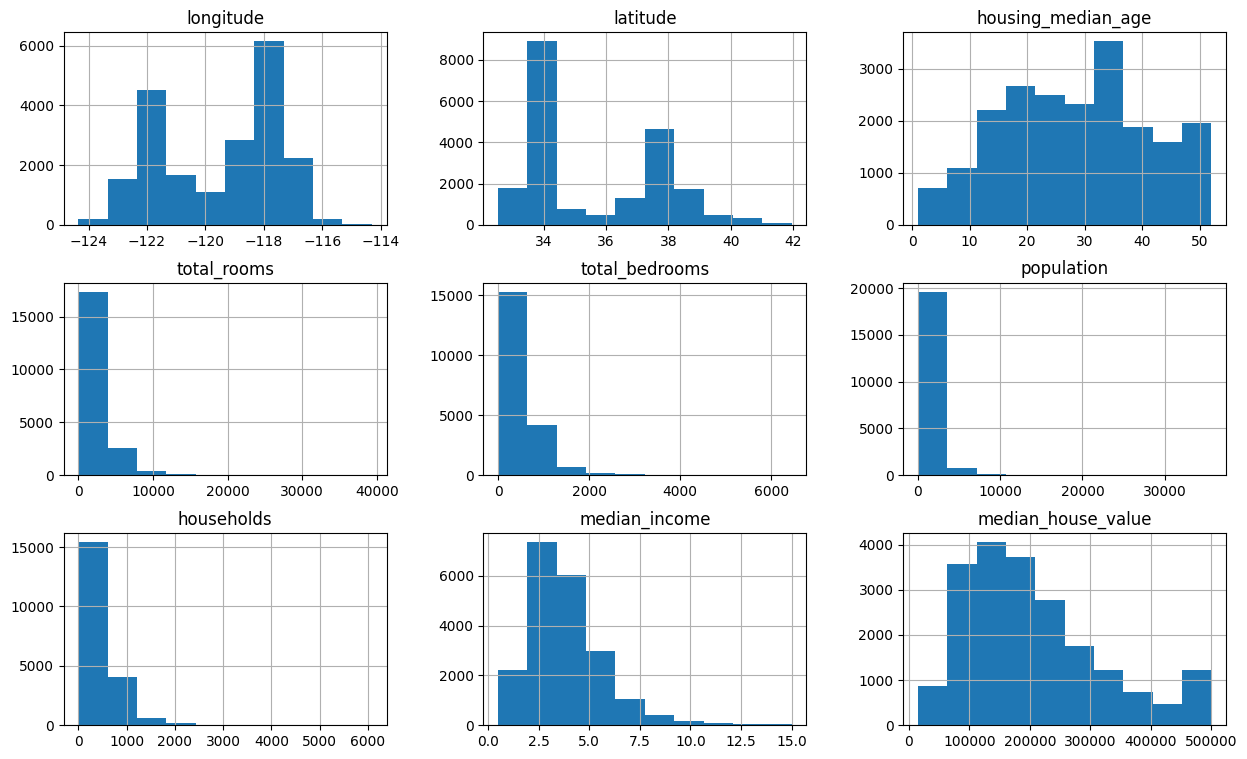

In [7]:
show_hist(data_one)

In [8]:
def show_corr(df):
    plt.figure(figsize=(15,9))
    correlation_matrix = df.corr(numeric_only=True)
    sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
    plt.show()

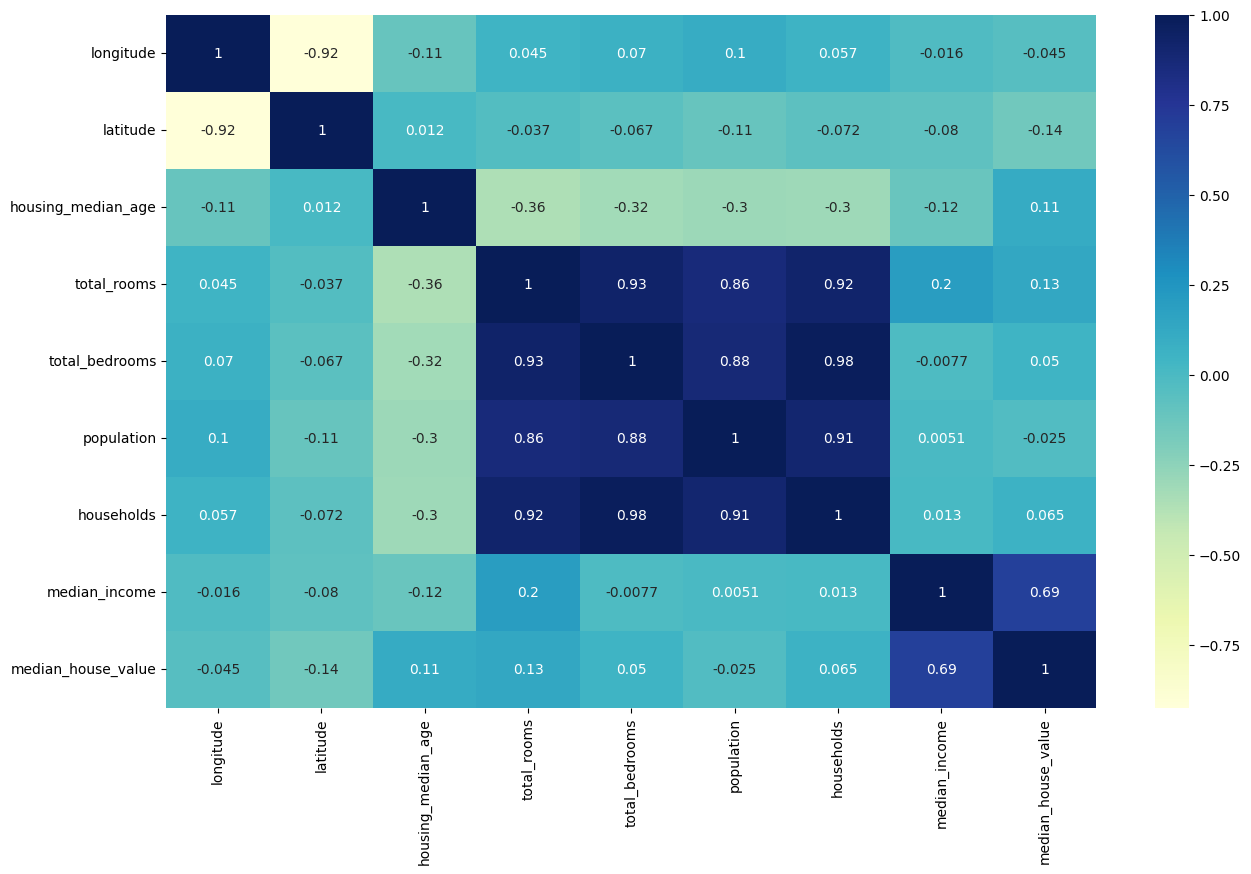

In [9]:
show_corr(data_one)

In [10]:
def tranformations(df, cols):
    for col in cols:
        df[col] = np.log(df[col] + 1)
    return df

In [11]:
columns_to_transform = ['total_rooms',
 'total_bedrooms',
 'population',
 'households']

In [12]:
transform_data = tranformations(data_one, columns_to_transform)

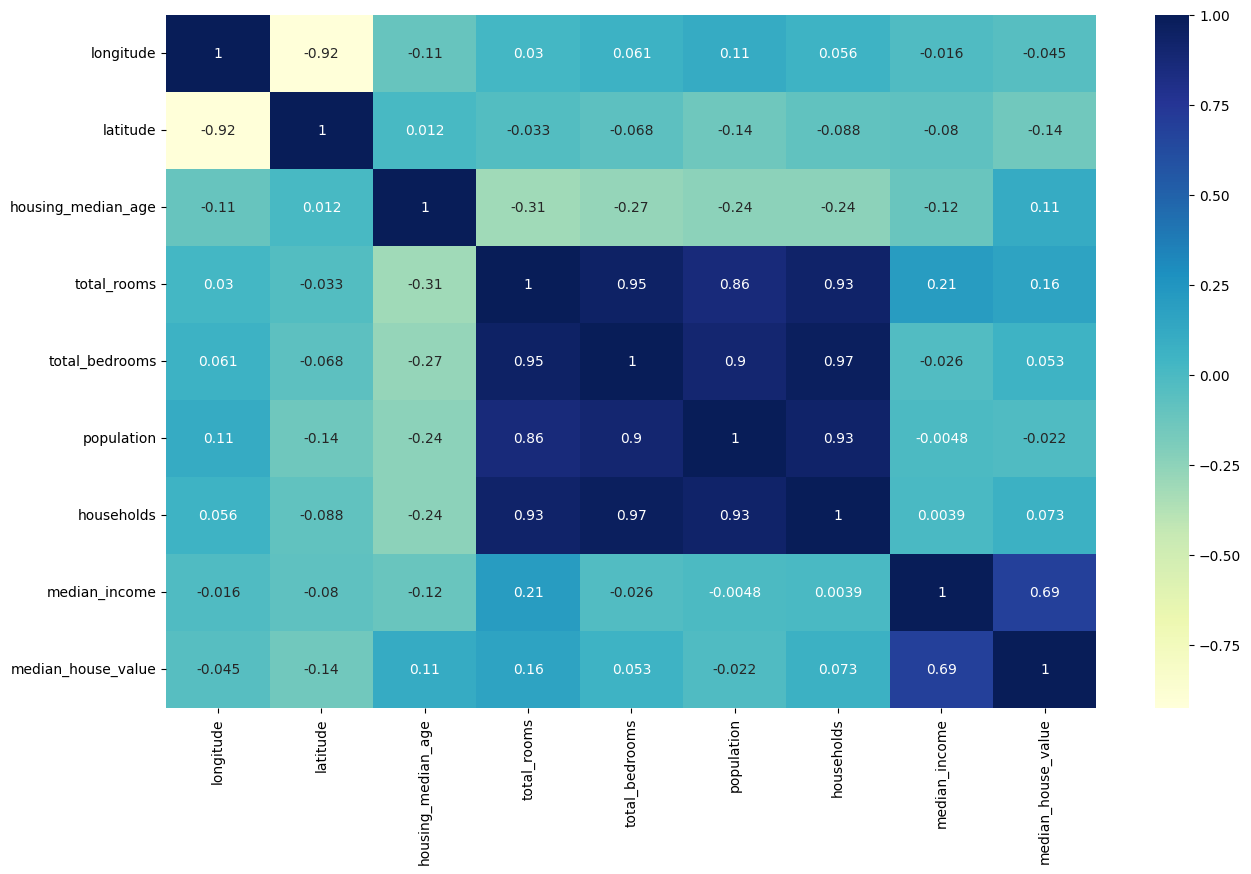

In [13]:
show_corr(transform_data)

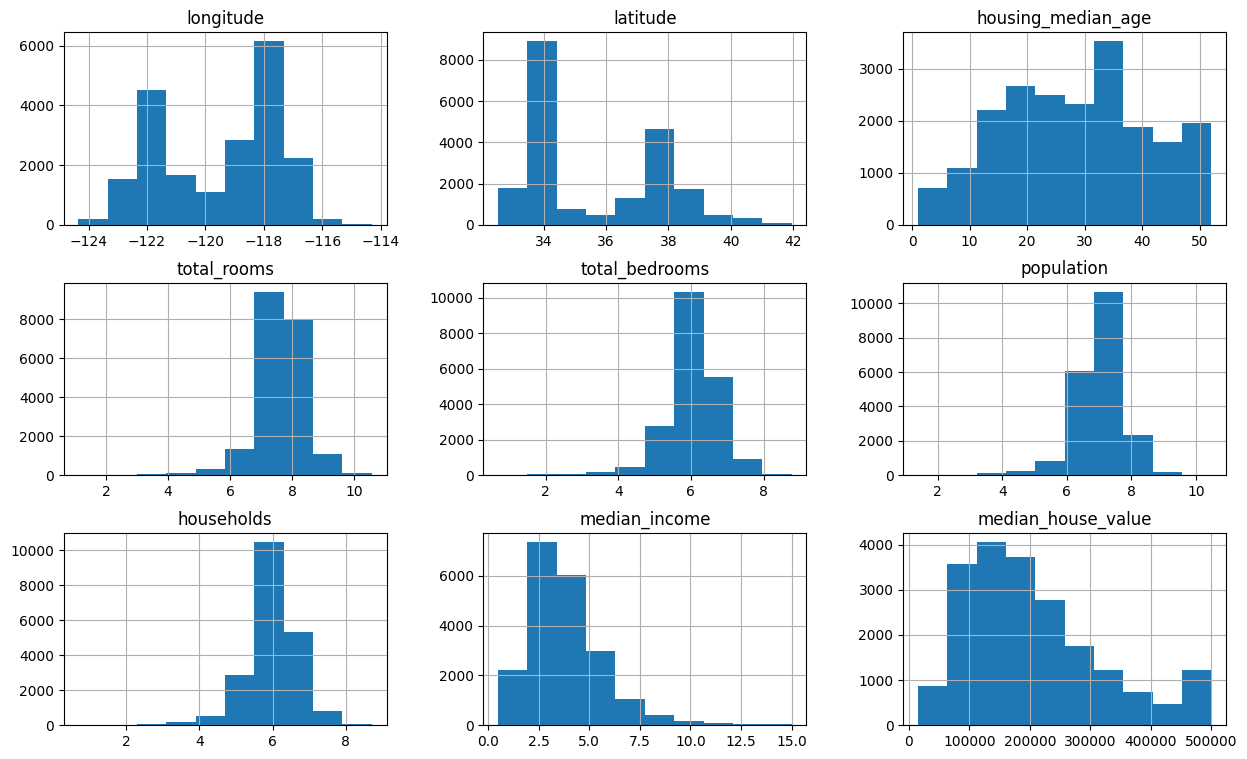

In [14]:
show_hist(transform_data)

In [15]:
transform_data.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [16]:
data_encoded = transform_data.join(pd.get_dummies(transform_data['ocean_proximity'])).drop(columns=['ocean_proximity'])

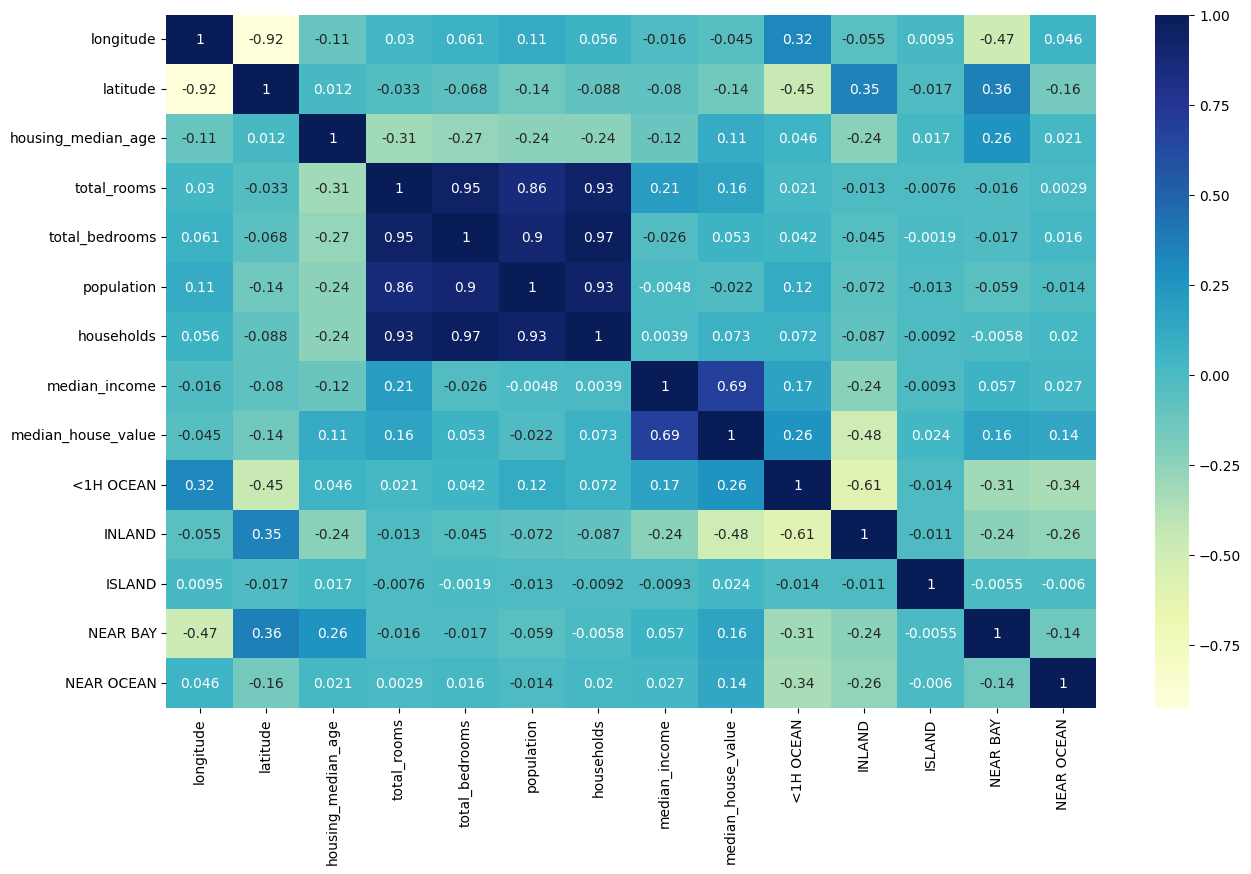

In [17]:
show_corr(data_encoded)

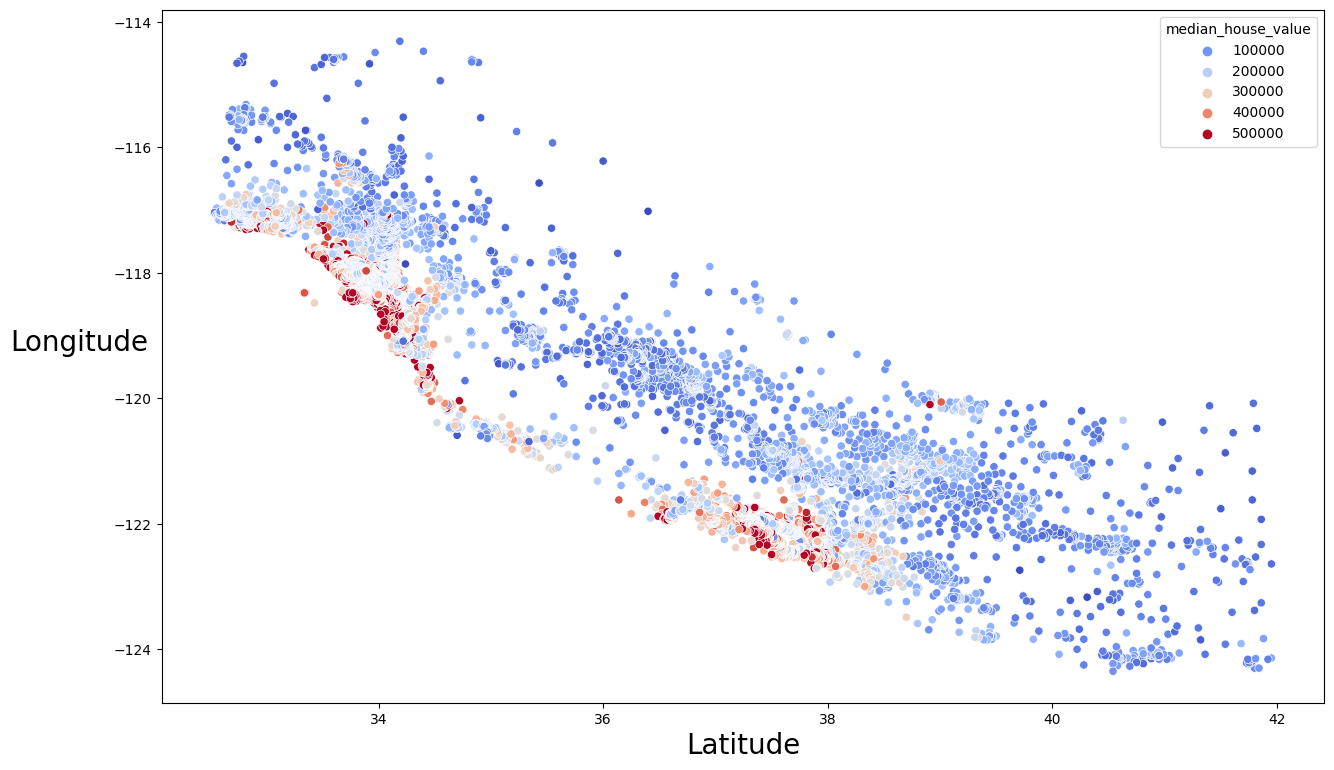

In [18]:
plt.figure(figsize=(15,9))
sns.scatterplot(x="latitude", y="longitude", data=data_encoded, hue="median_house_value", palette="coolwarm")
plt.xlabel("Latitude",size=20)
plt.ylabel("Longitude",size=20, rotation=0, labelpad=25)
plt.show()

In [19]:
data_encoded['bedroom_ratio'] = data_encoded['total_bedrooms'] / data_encoded['total_rooms']

In [20]:
data_encoded['household_rooms'] = data_encoded['total_rooms'] / data_encoded['households']

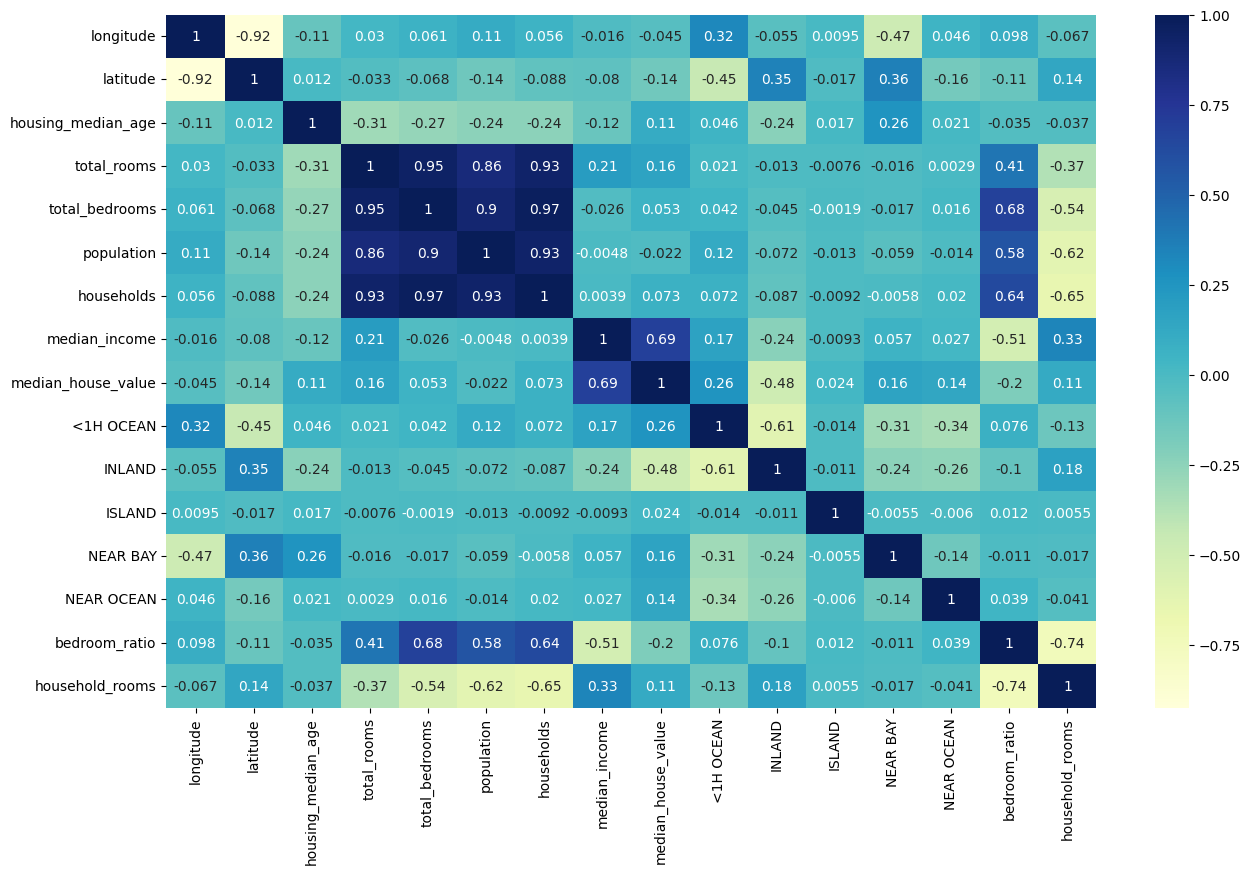

In [21]:
show_corr(data_encoded)

In [22]:
data_encoded

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,0,0,0,1,0,0.717813,1.399834
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,0,0,0,1,0,0.790429,1.260013
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,0,0,0,1,0,0.720313,1.407171
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,0,0,0,1,0,0.764097,1.325768
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,0,0,0,1,0,0.762444,1.329892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,78100.0,0,1,0,0,0,0.798973,1.278530
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,77100.0,0,1,0,0,0,0.766205,1.380045
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,92300.0,0,1,0,0,0,0.801228,1.271340
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,84700.0,0,1,0,0,0,0.799078,1.285243


# Modeling:
 For predictive modeling, I split the dataset into training and testing sets and standardized the numerical features using the StandardScaler. Two primary machine learning models were trained: a Linear Regression model and a Random Forest Regressor. Hyperparameter tuning was performed for the Random Forest model to optimize its performance.

In [23]:
x,y = data_encoded.drop(columns=['median_house_value']), data_encoded['median_house_value']

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.25, random_state=329)

sc = StandardScaler()
xtrain_scaled = sc.fit_transform(xtrain)
xtest_scaled = sc.transform(xtest)

In [25]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.7009414309078472

In [26]:
model.fit(xtrain_scaled, ytrain)
model.score(xtest_scaled, ytest)

0.7009414309078472

In [27]:
from sklearn.ensemble import RandomForestRegressor

model_2 = RandomForestRegressor()
model_2.fit(xtrain, ytrain)
model_2.score(xtest, ytest)

0.8222257869575164

In [28]:
model_2 = RandomForestRegressor()
model_2.fit(xtrain_scaled, ytrain)
model_2.score(xtest_scaled, ytest)

0.821220499506494

In [29]:
model_2 = RandomForestRegressor(n_estimators=300)
model_2.fit(xtrain, ytrain)
model_2.score(xtest, ytest)

0.8232709973393526

In [30]:
ypred = model_2.predict(xtest)

# Evaluation Model:
 performance was evaluated using standard regression metrics, including mean squared error (MSE) and mean absolute error (MAE). The Random Forest Regressor outperformed the Linear Regression model, demonstrating its superiority in predicting median house values.

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_squared_error(ytest, ypred)
mae = mean_absolute_error(ytest, ypred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 2398994182.0349064
Mean Absolute Error: 32277.73612252887


# Neural Network Implementation:
 In addition to traditional machine learning models, I explored neural network-based regression using the Keras library. A deep neural network architecture with multiple hidden layers was created, and early stopping was applied to prevent overfitting. Training and validation loss were visualized, and the R-squared (R2) score was calculated to assess the neural network's predictive accuracy.

In [45]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))

model.add(Dense(units=1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

early_stopping = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

history = model.fit(xtrain_scaled, ytrain, epochs=100, batch_size=64, validation_data=(xtest_scaled, ytest), callbacks=[early_stopping])

train_loss = history.history['loss']
val_loss = history.history['val_loss']

score = model.evaluate(xtest, ytest)
print(f"Mean Squared Error: {score[0]}")
print(f"Mean Absolute Error: {score[1]}")

Epoch 1/100
240/240 [==============================] - 4s 8ms/step - loss: 17056993280.0000 - mae: 90411.6328 - val_loss: 4680421888.0000 - val_mae: 49752.4805
Epoch 2/100
240/240 [==============================] - 1s 6ms/step - loss: 4592403456.0000 - mae: 47854.2109 - val_loss: 3934471936.0000 - val_mae: 44647.5508
Epoch 3/100
240/240 [==============================] - 1s 5ms/step - loss: 4198406400.0000 - mae: 45664.8086 - val_loss: 3846660608.0000 - val_mae: 45145.8477
Epoch 4/100
240/240 [==============================] - 1s 5ms/step - loss: 4048931328.0000 - mae: 44860.8750 - val_loss: 3666851584.0000 - val_mae: 42508.0156
Epoch 5/100
240/240 [==============================] - 1s 5ms/step - loss: 3981775872.0000 - mae: 44400.3359 - val_loss: 3587852288.0000 - val_mae: 42169.5195
Epoch 6/100
240/240 [==============================] - 1s 5ms/step - loss: 3969512192.0000 - mae: 44287.3633 - val_loss: 3719098880.0000 - val_mae: 43048.4297
Epoch 7/100
240/240 [========================

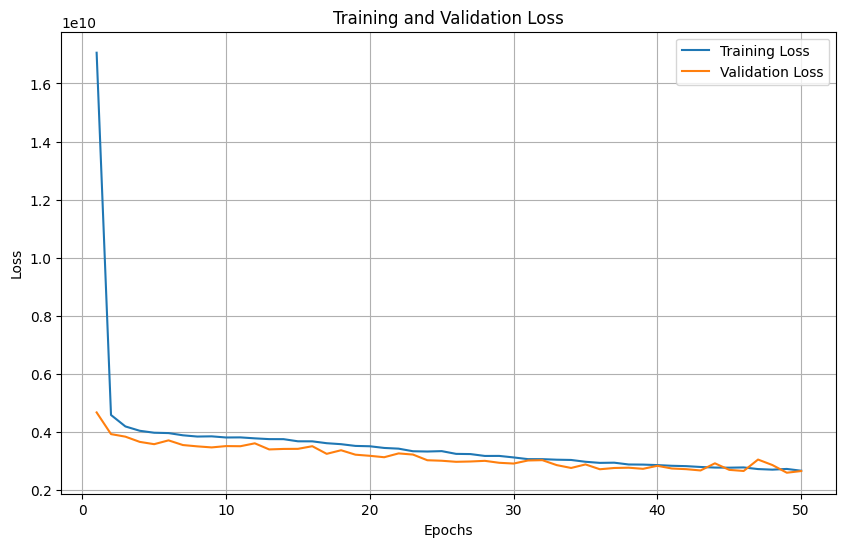

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [47]:
from sklearn.metrics import r2_score

predictions = model.predict(xtest_scaled)

r2 = r2_score(ytest, predictions)

print(f"R-squared (R2) Score: {r2}")

160/160 [==============================] - 0s 2ms/step
R-squared (R2) Score: 0.8007960857290816


# Conclusion:
 The project's overarching goal was to develop a reliable predictive model for estimating median house values based on various property attributes. Through data preprocessing, exploratory data analysis, and machine learning techniques, I successfully achieved this goal. The Random Forest Regressor emerged as the best-performing model, while the neural network provided an alternative approach to regression tasks.

This project provides valuable insights and tools for anyone interested in predicting housing prices or working on real estate valuation tasks using data-driven approaches.